# Part 1 - Step 1.1 - Reading Our Competitor's Data 

Using the APIs GET request function to fetch the data from the host. Then we must check if the request has succeeded before any operations are done.

Here, if the request_status is '200' which means the request has succeeded, then we start reading our table from the specific class. Else we halt running the notebook.

In [1]:
import numpy as np
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import math
import matplotlib.pyplot as plt

In [2]:
url = "https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares"
response = requests.get(url)

if response.status_code == 200:
    pageText = response.text
    beautifulSoup = BeautifulSoup(pageText)
    
    tableClass = "table table-striped table-responsive-md"
    tableBody = beautifulSoup.find(class_ = tableClass)
    prettifiedTableBody = tableBody.prettify()
    competitorDataFrame = pd.read_html(prettifiedTableBody)[0]
    competitorDataFrame.rename(columns={'Unnamed: 0':'Rank', 'Unnamed: 1':'X_Class', 'Unnamed: 2':'Date', 'Start':'Start Time',
                                       'Maximum':'Max Time', 'End':'End Time', 'Unnamed: 7':'Movie'}, inplace=True)
else:
    raise SystemExit("Request couldn't be completed with response code: " + str(response.status_code))

competitorDataFrame.head()

,Rank,X_Class,Date,Region,Start Time,Max Time,End Time,Movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,Movie View archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,Movie View archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,Movie View archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,Movie View archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,Movie View archive


______________
______________
# Part 1 - Step 1.2 - Removing Unwanted Columns and Rows
No need for "Movie" field, so we drop it.

In [3]:
competitorDataFrame.drop('Movie', axis=1, inplace=True)

competitorDataFrame.head()

,Rank,X_Class,Date,Region,Start Time,Max Time,End Time
0,1,X28+,2003/11/04,486,19:29,19:53,20:06
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24
3,4,X17+,2005/09/07,808,17:17,17:40,18:03
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55


______________
______________
# Part 1 - Step 2 - Combining Date Fields Together
Next, we would like to remove the "Date" field after appending it the the three-time columns. So by using a built in function "strptime" that takes any string and converts it to DateTime type according to a specific format given.

In [4]:
st_index = competitorDataFrame.columns.get_loc('Start Time')
et_index = competitorDataFrame.columns.get_loc('End Time')
mt_index = competitorDataFrame.columns.get_loc('Max Time')

for index, row in competitorDataFrame.iterrows():
    competitorDataFrame.iloc[index, st_index] = datetime.strptime(row['Date'] + ' ' + row['Start Time'], '%Y/%m/%d %H:%M')
    competitorDataFrame.iloc[index, et_index] = datetime.strptime(row['Date'] + ' ' + row['End Time'],   '%Y/%m/%d %H:%M')
    competitorDataFrame.iloc[index, mt_index] = datetime.strptime(row['Date'] + ' ' + row['Max Time'],   '%Y/%m/%d %H:%M')

competitorDataFrame.drop('Date', axis=1, inplace=True)
competitorDataFrame.replace(to_replace='-', value=np.nan, inplace=True)

competitorDataFrame.head()

,Rank,X_Class,Region,Start Time,Max Time,End Time
0,1,X28+,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2+,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17+,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00


____________
____________
# Part 1 - Step 3.1 - Reading Nasa's Data
We get the data from the link and splitting the raw data into lines.


In [5]:
url = "https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html"
response = requests.get(url)

if response.status_code == 200:
    pageText = response.text
    beautifulSoup = BeautifulSoup(pageText)
    
    tableBody = beautifulSoup.find("pre")    
    tableBodyText = tableBody.text
    lines = tableBodyText.splitlines()
    
else:
    raise SystemExit("Request couldn't be completed with response code: " + str(response.status_code))

_____________
_____________
# Part 1 - Step 3.2 - Building a DataFrame out of the Text Scraped
Only chose lines that we are sure they form the table which are from line 12 till the end -1. And remove unwanted columns and rename the rest of columns.

In [6]:
dataList = []
for line in lines[12:-1]:
    rowFields = line.split()
    dataList.append(rowFields[:15])

nasaDataFrame = pd.DataFrame(dataList, 
                             columns = ['Start Date', 'Start Time', 'End Date', 'End Time', 'Start Frequency',
                                        'End Frequency', 'Flare Location', 'Flare Region', 'Importance',
                                        'CME Date', 'CME Time', 'CPA', 'Width', 'Speed', 'Plots'])
nasaDataFrame.head()

,Start Date,Start Time,End Date,End Time,Start Frequency,End Frequency,Flare Location,Flare Region,Importance,CME Date,CME Time,CPA,Width,Speed,Plots
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX


________________________________
________________________________
# Part 1 - Step 3.3 - Cleaning the Data
Adjust last row and replace all the null data to np.nan

In [7]:
#Adjusting last row.
nasaDataFrame.iloc[-1][9:] = nasaDataFrame.iloc[-1][8:-1]
nasaDataFrame.iloc[-1][8]  = "----"

In [8]:
#Replace any null data to np.nan.
nasaDataFrame = nasaDataFrame.dropna(axis=0, how='any', thresh=1, inplace=False)
nasaDataFrame.replace(to_replace=['----------', '------', '-----','----', '---', '????', '--/--', '--:--'], value=np.nan, inplace=True)
nasaDataFrame.replace(to_replace= '24:00', value='00:00', inplace=True)

importance_index = nasaDataFrame.columns.get_loc('Importance')
for index, row in nasaDataFrame.iterrows(): 
    if not pd.isnull(row['Importance']):
        if(str(row['Importance'])[-1] == '.'):
            nasaDataFrame.iloc[index, importance_index] = str(row['Importance'])[:-1]
                
nasaDataFrame.head()

,Start Date,Start Time,End Date,End Time,Start Frequency,End Frequency,Flare Location,Flare Region,Importance,CME Date,CME Time,CPA,Width,Speed,Plots
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX


_______________________
_______________________
# Part 1 - Step 3.4 - Reformatting the Date Fields
Then we adjust all dates to 'dd/mm/yyyy' format

In [9]:
sd_index = nasaDataFrame.columns.get_loc('Start Date')
ed_index = nasaDataFrame.columns.get_loc('End Date')
cd_index = nasaDataFrame.columns.get_loc('CME Date')

for index, row in nasaDataFrame.iterrows():
    if not pd.isnull(['Start Date']):
        dateTimeObject = datetime.strptime(row['Start Date'], '%Y/%m/%d')
        nasaDataFrame.iloc[index, sd_index] = dateTimeObject.strftime('%d/%m/%Y')
    
    if not pd.isnull(row['End Date']):
        nasaDataFrame.iloc[index, ed_index] = datetime.strptime(row['End Date'] + '/' + str(dateTimeObject.year), '%m/%d/%Y').strftime('%d/%m/%Y')

    if not pd.isnull(row['CME Date']):
        nasaDataFrame.iloc[index, cd_index] = datetime.strptime(row['CME Date'] + '/' + str(dateTimeObject.year), '%m/%d/%Y').strftime('%d/%m/%Y')

nasaDataFrame.head()

,Start Date,Start Time,End Date,End Time,Start Frequency,End Frequency,Flare Location,Flare Region,Importance,CME Date,CME Time,CPA,Width,Speed,Plots
0,01/04/1997,14:00,01/04/1997,14:15,8000,4000,S25E16,8026,M1.3,01/04/1997,15:18,74,79,312,PHTX
1,07/04/1997,14:30,07/04/1997,17:30,11000,1000,S28E19,8027,C6.8,07/04/1997,14:27,Halo,360,878,PHTX
2,12/05/1997,05:15,14/05/1997,16:00,12000,80,N21W08,8038,C1.3,12/05/1997,05:30,Halo,360,464,PHTX
3,21/05/1997,20:20,21/05/1997,22:00,5000,500,N05W12,8040,M1.3,21/05/1997,21:00,263,165,296,PHTX
4,23/09/1997,21:53,23/09/1997,22:16,6000,2000,S29E25,8088,C1.4,23/09/1997,22:02,133,155,712,PHTX


_________
_________
# Part 1 - Step 3.5 - Casting Numeric Fields to Float Type
Converting string values into float values

In [10]:
nasaDataFrame['Start Frequency'] = [ float(field) for field in nasaDataFrame['Start Frequency']]
nasaDataFrame['End Frequency']   = [ float(field) for field in nasaDataFrame['End Frequency']]
nasaDataFrame['Speed']           = [ float(field) for field in nasaDataFrame['Speed']]

regions = ['altr', 'DSF', 'EP', 'FILA', 'DIM', 'EP?']
nasaDataFrame['Flare Region'] = [float(field) if not regions.__contains__(field) else np.nan for field in nasaDataFrame['Flare Region']]

nasaDataFrame.head()

,Start Date,Start Time,End Date,End Time,Start Frequency,End Frequency,Flare Location,Flare Region,Importance,CME Date,CME Time,CPA,Width,Speed,Plots
0,01/04/1997,14:00,01/04/1997,14:15,8000.0,4000.0,S25E16,8026.0,M1.3,01/04/1997,15:18,74,79,312.0,PHTX
1,07/04/1997,14:30,07/04/1997,17:30,11000.0,1000.0,S28E19,8027.0,C6.8,07/04/1997,14:27,Halo,360,878.0,PHTX
2,12/05/1997,05:15,14/05/1997,16:00,12000.0,80.0,N21W08,8038.0,C1.3,12/05/1997,05:30,Halo,360,464.0,PHTX
3,21/05/1997,20:20,21/05/1997,22:00,5000.0,500.0,N05W12,8040.0,M1.3,21/05/1997,21:00,263,165,296.0,PHTX
4,23/09/1997,21:53,23/09/1997,22:16,6000.0,2000.0,S29E25,8088.0,C1.4,23/09/1997,22:02,133,155,712.0,PHTX


_____________
_____________
# Part 1 - Step 4.1 - Add new 'Is_Halo' Column
Create a new column that indicates if a row corresponds to a halo flare or not, and then replace Halo entries in the cme_angle column as NA.

In [11]:
nasaDataFrame['Is_Halo'] = [ field == 'Halo' for field in nasaDataFrame['CPA']]
nasaDataFrame['CPA'].replace(to_replace='Halo', value=np.nan, inplace=True)
nasaDataFrame['CPA']  = [ float(field) for field in nasaDataFrame['CPA']]

nasaDataFrame.head()

,Start Date,Start Time,End Date,End Time,Start Frequency,End Frequency,Flare Location,Flare Region,Importance,CME Date,CME Time,CPA,Width,Speed,Plots,Is_Halo
0,01/04/1997,14:00,01/04/1997,14:15,8000.0,4000.0,S25E16,8026.0,M1.3,01/04/1997,15:18,74.0,79,312.0,PHTX,False
1,07/04/1997,14:30,07/04/1997,17:30,11000.0,1000.0,S28E19,8027.0,C6.8,07/04/1997,14:27,NaN,360,878.0,PHTX,True
2,12/05/1997,05:15,14/05/1997,16:00,12000.0,80.0,N21W08,8038.0,C1.3,12/05/1997,05:30,NaN,360,464.0,PHTX,True
3,21/05/1997,20:20,21/05/1997,22:00,5000.0,500.0,N05W12,8040.0,M1.3,21/05/1997,21:00,263.0,165,296.0,PHTX,False
4,23/09/1997,21:53,23/09/1997,22:16,6000.0,2000.0,S29E25,8088.0,C1.4,23/09/1997,22:02,133.0,155,712.0,PHTX,False


________________
________________
# Part 1 - Step 4.2 - Add new 'Width_Low' Column based on '>' character
Create a new column that indicates if width is given as a lower-bound, and remove any non-numeric part of the width column like '>' and 'h' characters.

In [12]:
nasaDataFrame['Width_Low'] = [(not pd.isnull(field) and '>' in field) for field in nasaDataFrame['Width']]
nasaDataFrame['Width'] = [field.replace('>','') if (not pd.isnull(field)) else field for field in nasaDataFrame['Width']]
nasaDataFrame['Width'] = [field.replace('h','') if (not pd.isnull(field)) else field for field in nasaDataFrame['Width']]
nasaDataFrame['Width'] = [float(field) for field in nasaDataFrame['Width']]

nasaDataFrame.head()

,Start Date,Start Time,End Date,End Time,Start Frequency,End Frequency,Flare Location,Flare Region,Importance,CME Date,CME Time,CPA,Width,Speed,Plots,Is_Halo,Width_Low
0,01/04/1997,14:00,01/04/1997,14:15,8000.0,4000.0,S25E16,8026.0,M1.3,01/04/1997,15:18,74.0,79.0,312.0,PHTX,False,False
1,07/04/1997,14:30,07/04/1997,17:30,11000.0,1000.0,S28E19,8027.0,C6.8,07/04/1997,14:27,NaN,360.0,878.0,PHTX,True,False
2,12/05/1997,05:15,14/05/1997,16:00,12000.0,80.0,N21W08,8038.0,C1.3,12/05/1997,05:30,NaN,360.0,464.0,PHTX,True,False
3,21/05/1997,20:20,21/05/1997,22:00,5000.0,500.0,N05W12,8040.0,M1.3,21/05/1997,21:00,263.0,165.0,296.0,PHTX,False,False
4,23/09/1997,21:53,23/09/1997,22:16,6000.0,2000.0,S29E25,8088.0,C1.4,23/09/1997,22:02,133.0,155.0,712.0,PHTX,False,False


_________
_________
# Part 1 - Step 4.3 - Setting all DateTime Fields to be of DateTime object Type
Combine date and time columns for start, end and cme and encoding them as datetime objects.

In [13]:
sd_index = nasaDataFrame.columns.get_loc('Start Date')
ed_index = nasaDataFrame.columns.get_loc('End Date')
cd_index = nasaDataFrame.columns.get_loc('CME Date')

for index, row in nasaDataFrame.iterrows():
    if not pd.isnull(row['Start Date']):
        nasaDataFrame.iloc[index, sd_index] = datetime.strptime(row['Start Date'] + ' ' + row['Start Time'], '%d/%m/%Y %H:%M') 
    if not pd.isnull(row['End Date']):
        nasaDataFrame.iloc[index, ed_index] = datetime.strptime(row['End Date']   + ' ' + row['End Time'],   '%d/%m/%Y %H:%M')
    if not pd.isnull(row['CME Date']):
        nasaDataFrame.iloc[index, cd_index] = datetime.strptime(row['CME Date']   + ' ' + row['CME Time'],   '%d/%m/%Y %H:%M')

nasaDataFrame.drop(['Start Time', 'End Time', 'CME Time'], axis=1, inplace=True)
nasaDataFrame.rename(columns={'Start Date':'Start_DateTime', 'End Date':'End_DateTime', 'CNE Date':'CNE_DateTime'}, inplace=True)

nasaDataFrame.head()

,Start_DateTime,End_DateTime,Start Frequency,End Frequency,Flare Location,Flare Region,Importance,CME Date,CPA,Width,Speed,Plots,Is_Halo,Width_Low
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000.0,4000.0,S25E16,8026.0,M1.3,1997-04-01 15:18:00,74.0,79.0,312.0,PHTX,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000.0,1000.0,S28E19,8027.0,C6.8,1997-04-07 14:27:00,NaN,360.0,878.0,PHTX,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000.0,80.0,N21W08,8038.0,C1.3,1997-05-12 05:30:00,NaN,360.0,464.0,PHTX,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000.0,500.0,N05W12,8040.0,M1.3,1997-05-21 21:00:00,263.0,165.0,296.0,PHTX,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000.0,2000.0,S29E25,8088.0,C1.4,1997-09-23 22:02:00,133.0,155.0,712.0,PHTX,False,False


__________
__________
# Part 2 - Replication - Step 1.1 - Sorting Nasa's Table According to Importance
According to Wikipedia the classification of Solar Flares is sorted as follow:
    **X > M > C > B > A**

In [14]:
#Remove any non-valid data from column 'Importance' like 'FILA' value.
nasaDataFrame['Importance'].replace(to_replace=['FILA'], value=np.nan, inplace=True)

In [15]:
#A function that sorts by 'Importance' value descendingly and then return the top 50.
def sort(dataFrame):
    importanceCharacter = []
    importanceNumber = []
    for index, row in dataFrame.iterrows(): 
        if pd.isnull(row['Importance']):
            importanceCharacter.append(np.nan)
            importanceNumber.append(np.nan)
        else:
            importanceCharacter.append(str(row['Importance'])[0])
            importanceNumber.append(float(str(row['Importance'])[1:])) 

    copyDataFrame = dataFrame.copy()
    importanceCharacterDf = pd.DataFrame(importanceCharacter, columns = ['Importance Character'])
    importanceNumberDf = pd.DataFrame(importanceNumber, columns = ['Importance Number'])

    copyDataFrame = pd.concat([copyDataFrame, importanceCharacterDf, importanceNumberDf], axis=1)

    sortedDataFrame = copyDataFrame.sort_values(by=['Importance Character', 'Importance Number', 'Start_DateTime'], ascending=False, inplace=False)
    sortedDataFrame.drop(['Importance Character', 'Importance Number'], axis=1, inplace=True)
    
    return sortedDataFrame

def top_50_of(dataFrame):
    sortedDataFrame = sort(dataFrame)
    top50DataFrame = sortedDataFrame.head(50)
    top50DataFrame = top50DataFrame.reset_index()
    #Remove the old 'index' column. And remove both 2 columns that were used only for sorting.
    top50DataFrame.drop(['index'], axis=1, inplace=True)
    
    return top50DataFrame

_________________
_________________
_________________
_________________
# Part 2 - Replication - Step 1.2 - Replicating the SpaceWeatherLive data from the NASA data.
To find common solar flares between the two tables we need to:
1. Create a copy of "competitorDataFrame" named "copyCompetitorDataFrame" to be altered later.
2. Make 'X_Class' column in "copyCompetitorDataFrame" be in the same format as 'Importance' Column in "nasaDataFrame".
3. Find the 'top 50' in Nasa's data.
4. Compare both 'top 50' from each DataFrames.

Only **35** rows could be replictaed from Nasa's Dataset.

In [16]:
#Create a copy of the competitorDataFrame.
copyCompetitorDataFrame = competitorDataFrame

x_class_index = copyCompetitorDataFrame.columns.get_loc('X_Class')
region_index  = copyCompetitorDataFrame.columns.get_loc('Region')

for index, row in copyCompetitorDataFrame.iterrows():
    if not pd.isnull(row['X_Class']):
        #Remove '+' sign in order to be able to compare both table tables with each other.
        copyCompetitorDataFrame.iloc[index, x_class_index] = str(row['X_Class']).replace('+','') 
        
        #To convert any x_class type like 'X9' to 'X9.0', to follow the same format as Nasa's table. For Replication Later.
        if len(row['X_Class'])== 2:
            copyCompetitorDataFrame.iloc[index, x_class_index] = str(row['X_Class']) + '.0'
            
        #To convert Region field to it's original field number. For Replication Later.
        region = row['Region']
        if not pd.isnull(region):
            if region < 5000:
                copyCompetitorDataFrame.iloc[index, region_index] = region + 10000
    
copyCompetitorDataFrame.head()

,Rank,X_Class,Region,Start Time,Max Time,End Time
0,1,X28,10486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2,10486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17,10808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00


In [17]:
#Find the top 50 of Nasa's data.
top50NasaDataFrame = top_50_of(nasaDataFrame)
top50NasaDataFrame.head(50)

,Start_DateTime,End_DateTime,Start Frequency,End Frequency,Flare Location,Flare Region,Importance,CME Date,CPA,Width,Speed,Plots,Is_Halo,Width_Low
0,2003-11-04 20:00:00,2003-11-04 00:00:00,10000.0,200.0,S19W83,10486.0,X28,2003-11-04 19:54:00,NaN,360.0,2657.0,PHTX,True,False
1,2001-04-02 22:05:00,2001-04-03 02:30:00,14000.0,250.0,N19W72,9393.0,X20,2001-04-02 22:06:00,261.0,244.0,2505.0,PHTX,False,False
2,2003-10-28 11:10:00,2003-10-29 00:00:00,14000.0,40.0,S16E08,10486.0,X17,2003-10-28 11:30:00,NaN,360.0,2459.0,PHTX,True,False
3,2001-04-15 14:05:00,2001-04-16 13:00:00,14000.0,40.0,S20W85,9415.0,X14,2001-04-15 14:06:00,245.0,167.0,1199.0,PHTX,False,False
4,2003-10-29 20:55:00,2003-10-29 00:00:00,11000.0,500.0,S15W02,10486.0,X10,2003-10-29 20:54:00,NaN,360.0,2029.0,PHTX,True,False
5,1997-11-06 12:20:00,1997-11-07 08:30:00,14000.0,100.0,S18W63,8100.0,X9.4,1997-11-06 12:10:00,NaN,360.0,1556.0,PHTX,True,False
6,2017-09-06 12:05:00,2017-09-07 08:00:00,16000.0,70.0,S08W33,12673.0,X9.3,2017-09-06 12:24:00,NaN,360.0,1571.0,PHTX,True,False
7,2006-12-05 10:50:00,2006-12-05 20:00:00,14000.0,250.0,S07E68,10930.0,X9.0,NaN,NaN,NaN,NaN,PHTX,False,False
8,2017-09-10 16:02:00,2017-09-11 06:50:00,16000.0,150.0,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360.0,3163.0,PHTX,True,False
9,2003-11-02 17:30:00,2003-11-03 01:00:00,12000.0,250.0,S14W56,10486.0,X8.3,2003-11-02 17:30:00,NaN,360.0,2598.0,PHTX,True,False


In [18]:
#Compare [the top 50 of Nasa's data] to the [top 50 of the competitors' data].

#We compare with 'class types' and 'start date'.
#We cannot compare with only 'class types' because some 'class types' are appears more than once so it will match more than one time.
#Instead we should be matching 'events'.
#Based on notice, we can recognize an event from its 'class type' and 'start date'.

is_common = []
for i_nasa, r_nasa in top50NasaDataFrame.iterrows():
    for i_comp, r_comp in copyCompetitorDataFrame.iterrows():
        if r_nasa['Importance'] == r_comp['X_Class'] and r_nasa['Start_DateTime'].date() == r_comp['Start Time'].date() and float(r_nasa['Flare Region']) == r_comp['Region']:
            is_common.append(r_nasa)
            
commonDataFrame = pd.DataFrame(is_common, columns = nasaDataFrame.columns)
commonDataFrame = commonDataFrame.reset_index()
#Remove the old 'index' column.
commonDataFrame.drop(['index'], axis=1, inplace=True)

print(str(len(commonDataFrame)) + " rows are replicated!")
commonDataFrame.head()

31 rows are replicated!


,Start_DateTime,End_DateTime,Start Frequency,End Frequency,Flare Location,Flare Region,Importance,CME Date,CPA,Width,Speed,Plots,Is_Halo,Width_Low
0,2003-11-04 20:00:00,2003-11-04 00:00:00,10000.0,200.0,S19W83,10486.0,X28,2003-11-04 19:54:00,NaN,360.0,2657.0,PHTX,True,False
1,2001-04-02 22:05:00,2001-04-03 02:30:00,14000.0,250.0,N19W72,9393.0,X20,2001-04-02 22:06:00,261.0,244.0,2505.0,PHTX,False,False
2,2003-10-29 20:55:00,2003-10-29 00:00:00,11000.0,500.0,S15W02,10486.0,X10,2003-10-29 20:54:00,NaN,360.0,2029.0,PHTX,True,False
3,1997-11-06 12:20:00,1997-11-07 08:30:00,14000.0,100.0,S18W63,8100.0,X9.4,1997-11-06 12:10:00,NaN,360.0,1556.0,PHTX,True,False
4,2017-09-06 12:05:00,2017-09-07 08:00:00,16000.0,70.0,S08W33,12673.0,X9.3,2017-09-06 12:24:00,NaN,360.0,1571.0,PHTX,True,False


____________
____________
# Part 3 - Integration - Step 1 - Find Best Matches
Find best matching row in the "NASA data" for each of the 'top 50' solar flares in the "SpaceWeatherLive data".

**Where we compared with 'class types' and 'start date' is more accurate.**

In [19]:
def get_best_match(r_nasa, data):
    rankList = [None] * 7 #Ranks will be inserted to this list according to priority.
    for i, r_comp in data.iterrows():
        if r_nasa['Importance'] == r_comp['X_Class'] and  r_nasa['Start_DateTime'].date() == r_comp['Start Time'].date() and float(r_nasa['Flare Region']) == r_comp['Region']:
            rankList[0] = (i, r_comp['Rank'])
    
    for i, r_comp in data.iterrows():
        if not pd.isnull(r_nasa['Importance']) and r_nasa['Importance'][0] == r_comp['X_Class'][0] and math.floor(float(r_nasa['Importance'][1:])) == math.floor(float(r_comp['X_Class'][1:])) and r_nasa['Start_DateTime'].date() == r_comp['Start Time'].date():
            rankList[1] = (i, r_comp['Rank'])

    
    for i, r_comp in data.iterrows():
        if r_nasa['Importance'] == r_comp['X_Class'] and r_nasa['Start_DateTime'].date() == r_comp['Start Time'].date():
            rankList[4] = (i, r_comp['Rank'])

    
    for i, r_comp in data.iterrows():
        if r_nasa['Importance'] == r_comp['X_Class'] and float(r_nasa['Flare Region']) == r_comp['Region']:
            rankList[3] = (i, r_comp['Rank'])

    
    for i, r_comp in data.iterrows():
        if r_nasa['Importance'] == r_comp['X_Class']:        
            rankList[2] =(i, r_comp['Rank'])

        
    for i, r_comp in data.iterrows():
        if r_nasa['Start_DateTime'].date() == r_comp['Start Time'].date() and float(r_nasa['Flare Region']) == r_comp['Region']:
            rankList[5] = (i, r_comp['Rank'])

    for i, r_comp in data.iterrows():
        if r_nasa['Start_DateTime'].date() == r_comp['Start Time'].date():        
            rankList[6] = (i, r_comp['Rank'])

    
    #First non zero rank has the most priority.
    for r in range(7):
        if rankList[r] != None:
            data.drop(rankList[r][0], inplace=True) #Drop the row, in order to not match again with other event.
            return rankList[r][1]
        
    return np.nan

In [20]:
ranks = []
match_counter = 0
copy_competitorDataFrame = competitorDataFrame.copy()


for index, r_nasa in nasaDataFrame.iterrows():
    rank = get_best_match(r_nasa, copy_competitorDataFrame)        
    ranks.append(rank)
    if str(rank) != "nan":
        match_counter += 1

rankDataFrame = pd.DataFrame(ranks, columns = ['Rank'])
nasaDataFrame = pd.concat([nasaDataFrame, rankDataFrame], axis=1)

print(match_counter, "rows are matched!")
nasaDataFrame.head()

39 rows are matched!


,Start_DateTime,End_DateTime,Start Frequency,End Frequency,Flare Location,Flare Region,Importance,CME Date,CPA,Width,Speed,Plots,Is_Halo,Width_Low,Rank
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000.0,4000.0,S25E16,8026.0,M1.3,1997-04-01 15:18:00,74.0,79.0,312.0,PHTX,False,False,NaN
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000.0,1000.0,S28E19,8027.0,C6.8,1997-04-07 14:27:00,NaN,360.0,878.0,PHTX,True,False,NaN
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000.0,80.0,N21W08,8038.0,C1.3,1997-05-12 05:30:00,NaN,360.0,464.0,PHTX,True,False,NaN
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000.0,500.0,N05W12,8040.0,M1.3,1997-05-21 21:00:00,263.0,165.0,296.0,PHTX,False,False,NaN
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000.0,2000.0,S29E25,8088.0,C1.4,1997-09-23 22:02:00,133.0,155.0,712.0,PHTX,False,False,NaN
5,1997-11-03 05:15:00,1997-11-03 12:00:00,14000.0,250.0,S20W13,8100.0,C8.6,1997-11-03 05:28:00,240.0,109.0,227.0,PHTX,False,False,NaN
6,1997-11-03 10:30:00,1997-11-03 11:30:00,14000.0,5000.0,S16W21,8100.0,M4.2,1997-11-03 11:11:00,233.0,122.0,352.0,PHTX,False,False,NaN
7,1997-11-04 06:00:00,1997-11-05 04:30:00,14000.0,100.0,S14W33,8100.0,X2.1,1997-11-04 06:10:00,NaN,360.0,785.0,PHTX,True,False,NaN
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000.0,100.0,S18W63,8100.0,X9.4,1997-11-06 12:10:00,NaN,360.0,1556.0,PHTX,True,False,7.0
9,1997-11-27 13:30:00,1997-11-27 14:00:00,14000.0,7000.0,N17E63,8113.0,X2.6,1997-11-27 13:56:00,98.0,91.0,441.0,PHTX,False,False,50.0


__________
__________

# Part 4 - Analysis
Nasa's Start Frequency over time.

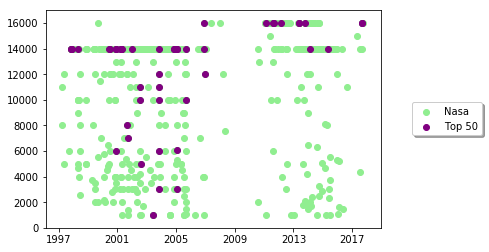

In [21]:
all_nasaDate = [row['Start_DateTime'].date() for i, row in nasaDataFrame.iterrows()]
plt.scatter(all_nasaDate, nasaDataFrame['Start Frequency'], c='lightgreen', label='Nasa')

top_nasaDate = [row['Start_DateTime'].date() for i, row in top50NasaDataFrame.iterrows()]
plt.scatter(top_nasaDate, top50NasaDataFrame['Start Frequency'], c='purple', label='Top 50')

plt.legend(loc='upper center', bbox_to_anchor=(1.2, 0.6), shadow=True, ncol=1)

plt.show()

Halo Bar Plot.

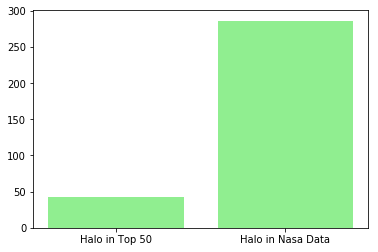

Top 50 Halo Ratio is: 0.84
NasaDataFrame Halo Ratio is: 0.5521235521235521


In [22]:
top50isHaloCount = sum(top50NasaDataFrame['Is_Halo'])
nasaDataFrameHaloCount = sum(nasaDataFrame['Is_Halo'])

plt.bar(x=["Halo in Top 50", "Halo in Nasa Data"], height=[top50isHaloCount, nasaDataFrameHaloCount], color = 'lightgreen')
plt.show()

print("Top 50 Halo Ratio is:", top50isHaloCount/len(top50NasaDataFrame))
print("NasaDataFrame Halo Ratio is:", nasaDataFrameHaloCount/len(nasaDataFrame))